In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

def loadImageData(train_dir,valid_dir,test_dir,data_train_transform, data_valid_test_transform):
    # Creating training set
    train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                    transform=data_train_transform, # transforms to perform on data (images)
                                    target_transform=None) # transforms to perform on labels (if necessary)

    # Creating validation set
    valid_data = datasets.ImageFolder(root=valid_dir, # target folder of images
                                    transform=data_valid_test_transform, # transforms to perform on data (images)
                                    target_transform=None) # transforms to perform on labels (if necessary)

    #Creating test set
    test_data = datasets.ImageFolder(root=test_dir, transform=data_valid_test_transform)

    print(f"Train data:\n{train_data}\nValidation data:\n{valid_data}\nTest data:\n{test_data}")

    # Get class names as a list
    class_names = train_data.classes
    print("Class names: ",class_names)

    # Check the lengths
    print("The lengths of the training, validation and test sets: ", len(train_data), len(valid_data), len(test_data))  

    return train_data, valid_data, test_data, class_names


def myDataLoader(train_data, valid_data, test_data, NUM_WORKERS, BATCH_SIZE, BATCH_SIZE_VALID, BATCH_SIZE_TEST):

    # Turn train and test Datasets into DataLoaders
    train_dataloader = DataLoader(dataset=train_data, 
                                batch_size=BATCH_SIZE, # how many samples per batch?
                                num_workers=NUM_WORKERS,
                                shuffle=True) # shuffle the data?

    # Turn train and test Datasets into DataLoaders
    valid_dataloader = DataLoader(dataset=valid_data, 
                                batch_size=BATCH_SIZE_VALID, # how many samples per batch?
                                num_workers=NUM_WORKERS,
                                shuffle=True) # shuffle the data?

    test_dataloader = DataLoader(dataset=test_data, 
                                batch_size=BATCH_SIZE_TEST, 
                                num_workers=NUM_WORKERS,
                                shuffle=False) # don't usually need to shuffle testing data

    # Now let's get a batch image and check the shape of this batch.    
    img, label = next(iter(train_dataloader))

    # Note that batch size will now be 1.  
    print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
    print(f"Label shape: {label.shape}")

    return train_dataloader, valid_dataloader, test_dataloader  

C:\Users\vegag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision.models import resnet152, ResNet152_Weights
import os

def get_data_sets_path(data_path):
    train_dir = os.path.join(data_path,"train")
    valid_dir = os.path.join(data_path,"valid")
    test_dir = os.path.join(data_path,"test")
    print("train dir: ", train_dir)
    print("valid dir: ", valid_dir)
    print("test dir: ", test_dir)
    return train_dir, valid_dir, test_dir

data_path = 'data'
train_dir, valid_dir, test_dir = get_data_sets_path(data_path)

train dir:  data\train
valid dir:  data\valid
test dir:  data\test


In [3]:
def transform_data():
    weights = ResNet152_Weights.DEFAULT
    preprocess = weights.IMAGENET1K_V2.transforms()

    return preprocess
batch_size = 1
transform = transform_data()

train_data, valid_data, test_data, class_names = loadImageData(train_dir,valid_dir,test_dir,transform, transform)
train_dataloader, valid_dataloader, test_dataloader = myDataLoader(
    train_data=train_data, 
    valid_data=valid_data, 
    test_data=test_data, 
    NUM_WORKERS=0, 
    BATCH_SIZE=batch_size, 
    BATCH_SIZE_VALID=batch_size, 
    BATCH_SIZE_TEST=1
)

Train data:
Dataset ImageFolder
    Number of datapoints: 6011
    Root location: data\train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
Validation data:
Dataset ImageFolder
    Number of datapoints: 2019
    Root location: data\valid
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1975
    Root location: data\test
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std

In [4]:
from torch import nn
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        
        weights = ResNet152_Weights.DEFAULT
        self.model = resnet152(weights=weights).to(device)
        self.model.fc = nn.Identity()

    def forward(self, x):
        output = self.model(x)
        return output
    
model = EmbeddingNet()
model.load_state_dict(torch.load('embedding_net/embedding_net.pth'))
model.to(device)
model.eval()

EmbeddingNet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [5]:
with torch.no_grad():
    embeddings = []
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            embedding = model(images)
            embeddings.append(embedding[0].cpu().numpy())

In [6]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go


#PCA, TSNE, UMAP

class Visualize:
    def __init__(self, train_features, train_labels, vis_type, n_comp):
        self.train_features = np.array(train_features)
        self.train_labels = np.array(train_labels)
        self.vis_type = vis_type
        self.n_comp = n_comp
        """if self.vis_type == "TSNE":
            self.visualizer = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit(self.train_features)"""
    
    def visualization(self):

        if self.vis_type == "PCA":
            pca = PCA(n_components=2).fit(self.train_features)
            train_embedded = pca.transform(self.train_features)


        if self.vis_type == "TSNE":
            train_embedded = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit_transform(self.train_features)

        if self.vis_type == 'UMAP':
            reducer = umap.UMAP(n_components=self.n_comp)

            train_scaled_data = StandardScaler().fit_transform(self.train_features)
            
            train_embedded = reducer.fit_transform(train_scaled_data)
            
        
        if self.n_comp == 2:
            sns.scatterplot(x=train_embedded[:, 0], y=train_embedded[:, 1], hue=self.train_labels, palette='tab10', legend=False)
            plt.xlabel(f'{self.vis_type} Component 1')
            plt.ylabel(f'{self.vis_type} Component 2')
            plt.title('TRAIN')
            plt.savefig(f'{self.vis_type}_train_2D.png')
            plt.show()
            plt.close()

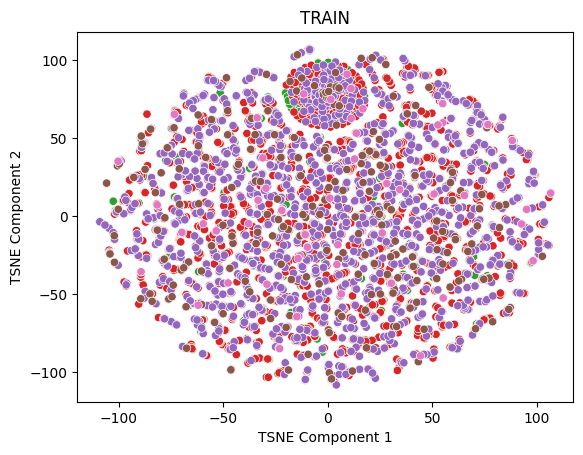

In [8]:
visualization = Visualize(embeddings, train_data.targets, 'TSNE', 2)
visualization.visualization()